# Generating Statistics from a CSV File

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in the Boston Housing dataset (given as a .csv file) from the local directory

In [2]:
house = pd.read_csv('datasets/Boston_housing.csv')

Check the first 10 records. Find the total number of records

In [3]:
house.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
print(house.shape)

(506, 14)


Create a smaller DataFrame

In [5]:
house = house.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis=1)
house.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,36.2


Check the last seven records of the new DataFrame you just created

In [6]:
house.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


Plot the histograms of all the variables (columns) in the new DataFrame

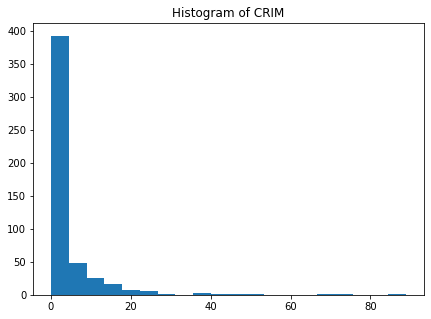

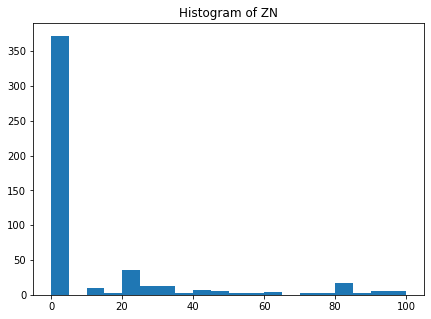

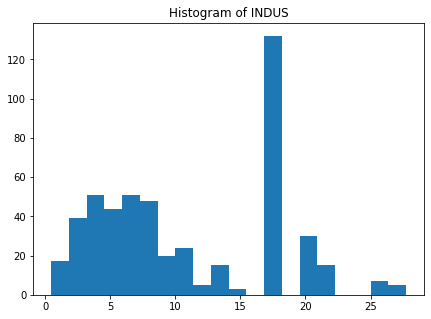

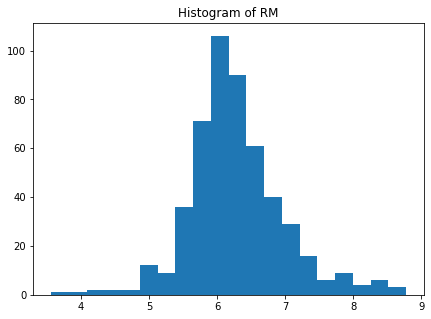

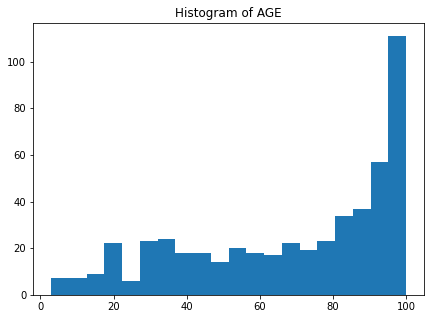

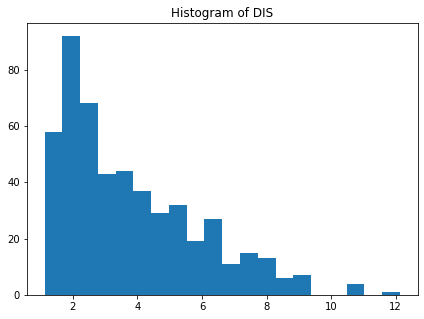

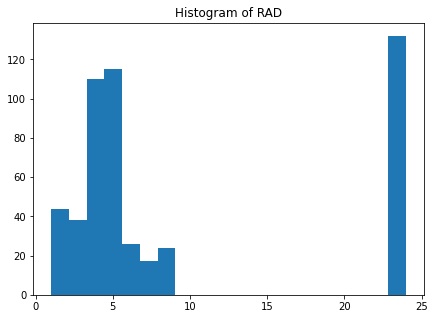

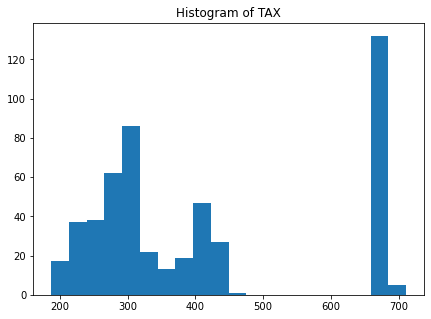

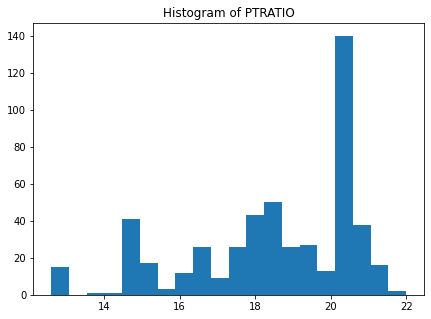

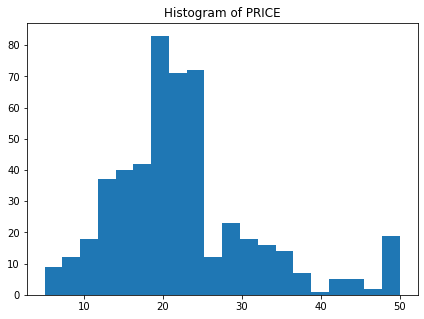

In [7]:
for col in house.columns:
    plt.figure(figsize=(7,5))
    plt.title('Histogram of ' + col)
    plt.hist(house[col], bins=20)
    plt.show()

Create a scatter plot of crime rate versus price

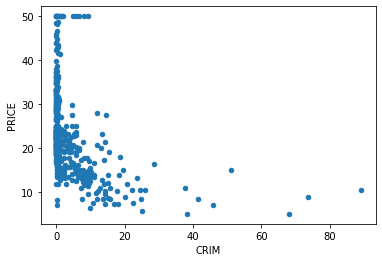

In [8]:
house.plot.scatter('CRIM', 'PRICE')
plt.show()

Plot log10(crime) versus price

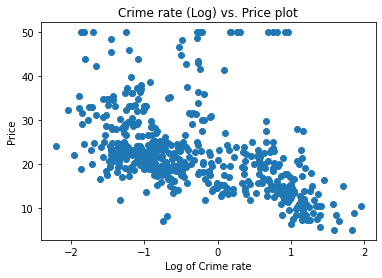

In [9]:
plt.figure()
plt.scatter(x=np.log10(house['CRIM']), y=house['PRICE'])
plt.title('Crime rate (Log) vs. Price plot')
plt.xlabel('Log of Crime rate')
plt.ylabel('Price')
plt.show()

Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distances to five Boston employment centers, and the percentage of houses with a low price (< $20,000)

In [10]:
house.describe()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.596783,23.322453,6.860353,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.647422,12.500000,18.100000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000
